In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
pd.plotting.register_matplotlib_converters()
from sklearn import svm

In [2]:
df=pd.read_csv('Placement_Data_Full_Class_1.csv')

In [3]:
df.drop(['Unnamed: 0','sl_no'],axis=1,inplace=True)

In [67]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 13)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


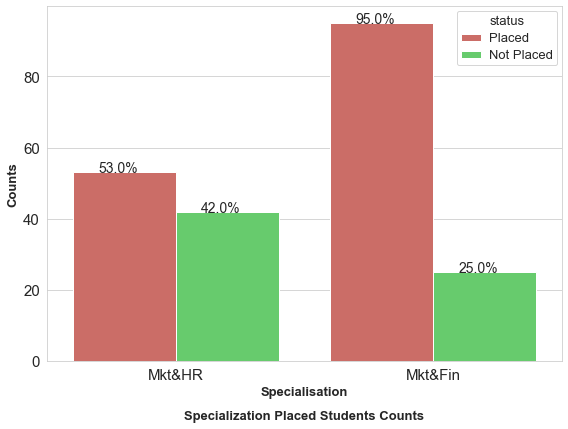

In [72]:
sns.set_style(style="whitegrid",)
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x="specialisation",hue="status",data=df)
plt.setp(ax.get_legend().get_texts(), fontsize='13') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='13') # for legend title
plt.title("Specialization Placed Students Counts",fontsize=13,y=-0.18,fontweight='bold')

plt.tick_params(labelsize=15)
plt.ylabel("Counts",fontsize=13,fontweight='bold')
plt.xlabel("Specialisation",fontsize=13,fontweight='bold')
total = len(df['specialisation'])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),size = 14)
#with_hue(ax,df.specialisation,2,2)
plt.tight_layout()
plt.savefig('Specialization Placed Student Count.eps')
plt.show()


In [6]:
con_tb=pd.crosstab(df.specialisation,df.status,margins=True)
con_tb

status,Not Placed,Placed,All
specialisation,,,
Mkt&Fin,25,95,120
Mkt&HR,42,53,95
All,67,148,215


In [15]:
#chi square test of indendence
from scipy.stats import chi2_contingency
(chi2,p,dof,_)=chi2_contingency([con_tb.iloc[0,0:2].values,con_tb.iloc[1,0:2].values,con_tb.iloc[2,0:2].values])

In [16]:
print("chi2     =",chi2)
print("p    :",p)
print("dof   :",dof)
print("expected ",_)

chi2     = 13.508014470676486
p    : 0.001166197019007658
dof   : 2
expected  [[ 37.39534884  82.60465116]
 [ 29.60465116  65.39534884]
 [ 67.         148.        ]]


# crammer's v test

In [17]:
np.sqrt(chi2/(df.shape[0]))

0.25065509027788807

For the range of values between -1 and 1, there are come crude estimates or rules of thumb which are as follows:
.70 and higher — very strong positive relationship
.40 to .69 — strong positive relationship
.30 to .39 — moderate positive relationship
.20 to .29 — weak positive relationship
.01 to .19 — no or negligible relationship
0 — no relationship
-.01 to -.19 — no or negligible relationship
-.20 to -.29 — weak negative relationship
-.30 to -.39 — moderate negative relationship
-.40 to -.69 — strong negative relationship
-.70 and lower — very strong negative relationship